In [132]:
import montecarlo as m
from matplotlib import pyplot
import pandas as pd
import numpy as np
import copy

Scenario 1

In [27]:
fair_coin1 = m.Die(['H','T'])
fair_coin2 = m.Die(['H','T'])
fair_coin3 = m.Die(['H','T'])

unfair_coin1 = m.Die(['H', 'T'])
unfair_coin2 = m.Die(['H', 'T'])
unfair_coin3 = m.Die(['H', 'T'])

unfair_coin1.change_weight('H', 5)
unfair_coin2.change_weight('H', 5)
unfair_coin3.change_weight('H', 5)

In [28]:
fair_game = m.Game([fair_coin1,fair_coin2,fair_coin3])
n_rolls = 1000
fair_game.play(n_rolls)
fair_game.show()

die number,0,1,2
roll number,,,
0,T,T,H
1,T,H,T
2,T,H,H
3,H,H,T
4,H,T,T
...,...,...,...
995,T,T,T
996,T,T,H
997,H,H,H


In [29]:
unfair_game = m.Game([unfair_coin1,unfair_coin2,fair_coin3])
unfair_game.play(1000)
unfair_game.show()

die number,0,1,2
roll number,,,
0,H,H,T
1,H,H,T
2,H,H,H
3,H,H,H
4,H,H,T
...,...,...,...
995,H,H,T
996,H,H,H
997,H,T,T


In [30]:
unfair_analyze = m.Analyzer(unfair_game)
jack_unfair = unfair_analyze.jackpot()

In [31]:
fair_analyze = m.Analyzer(fair_game)
jack_fair = fair_analyze.jackpot()

In [32]:
jack_freq_unfair = jack_unfair/n_rolls
jack_freq_unfair

0.375

In [33]:
jack_freq_fair = jack_fair/n_rolls
jack_freq_fair

0.258

<BarContainer object of 2 artists>

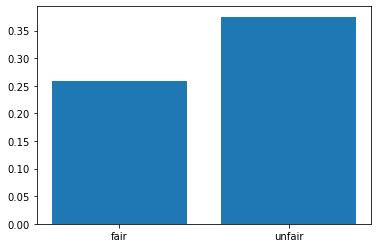

In [34]:
data= {'fair': jack_freq_fair, 'unfair': jack_freq_unfair}
pyplot.bar(data.keys(), data.values())

Scenario 2

In [35]:
fair_die = m.Die([1,2,3,4,5,6])
unfair_dietype1 = m.Die([1,2,3,4,5,6])
unfair_dietype1.change_weight(6,5)
unfair_dietype2 = m.Die([1,2,3,4,5,6])
unfair_dietype2.change_weight(1,5)

In [36]:
fair_die1 = m.Die([1,2,3,4,5,6])
fair_die2 = m.Die([1,2,3,4,5,6])
fair_die3 = m.Die([1,2,3,4,5,6])
fair_die4 = m.Die([1,2,3,4,5,6])
fair_die5 = m.Die([1,2,3,4,5,6])
fair_game = m.Game([fair_die1,fair_die2,fair_die3,fair_die4,fair_die5])
n_rolls =10000


In [37]:
fair_game.play(n_rolls)

In [38]:
fair_game.show()

die number,0,1,2,3,4
roll number,,,,,
0,3,5,2,1,2
1,1,5,4,1,4
2,6,2,3,2,1
3,3,3,3,6,2
4,5,6,6,3,2
...,...,...,...,...,...
9995,6,4,3,6,1
9996,1,3,6,6,2
9997,1,4,4,2,6


In [39]:
unfair_dietype1_1 = m.Die([1,2,3,4,5,6])
unfair_dietype1_1.change_weight(6,5)
unfair_dietype1_2 = m.Die([1,2,3,4,5,6])
unfair_dietype1_2.change_weight(6,5)
unfair_dietype2_1 = m.Die([1,2,3,4,5,6])
unfair_dietype2_1.change_weight(1,5)
fair_die1 = m.Die([1,2,3,4,5,6])
fair_die2 = m.Die([1,2,3,4,5,6])
unfair_game = m.Game([unfair_dietype1_1,unfair_dietype1_2,unfair_dietype2_1,fair_die1,fair_die2])

In [40]:
unfair_game.play(n_rolls)

In [41]:
unfair_game.show()

die number,0,1,2,3,4
roll number,,,,,
0,1,6,6,1,2
1,6,3,1,2,2
2,4,6,1,1,5
3,5,6,4,4,2
4,2,1,1,1,4
...,...,...,...,...,...
9995,3,6,2,3,6
9996,6,4,1,5,3
9997,2,1,1,3,2


<BarContainer object of 2 artists>

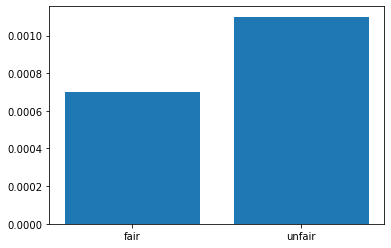

In [42]:
fair_anal = m.Analyzer(fair_game)
unfair_anal = m.Analyzer(unfair_game)

jack_freq_fair = fair_anal.jackpot()/n_rolls
jack_freq_unfair = unfair_anal.jackpot()/n_rolls

data= {'fair': jack_freq_fair, 'unfair': jack_freq_unfair}
pyplot.bar(data.keys(), data.values())


In [43]:
combo_fair = fair_anal.combo()
combo_unfair = unfair_anal.combo()

In [49]:
combo_fair.head(10)

,0,1,2,3,4,n
0,1,2,3,5,6,176
1,1,2,3,4,6,163
2,1,2,3,4,5,155
3,1,3,4,5,6,155
4,1,2,4,5,6,143
5,2,3,4,5,6,127
6,2,3,4,5,5,105
7,2,2,3,5,6,101
8,2,3,3,5,6,98
9,1,3,3,4,5,93


In [ ]:
combo_unfair.head(10)

In [106]:
freqs = combo_fair.head(10)["n"].values.tolist()
nums = combo_fair.head(10)[[0,1,2,3,4]].values.tolist()
nums = [str(i) for i in nums]

<BarContainer object of 10 artists>

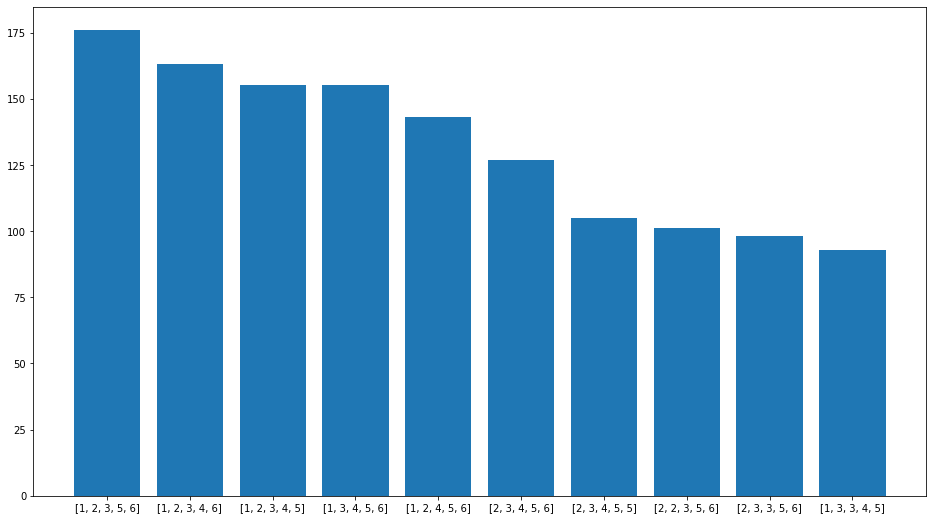

In [116]:
pyplot.figure(figsize=(16,9))
pyplot.bar(nums, freqs)

In [117]:
freqs1 = combo_unfair.head(10)["n"].values.tolist()
nums1 = combo_unfair.head(10)[[0,1,2,3,4]].values.tolist()
nums1 = [str(i) for i in nums1]

<BarContainer object of 10 artists>

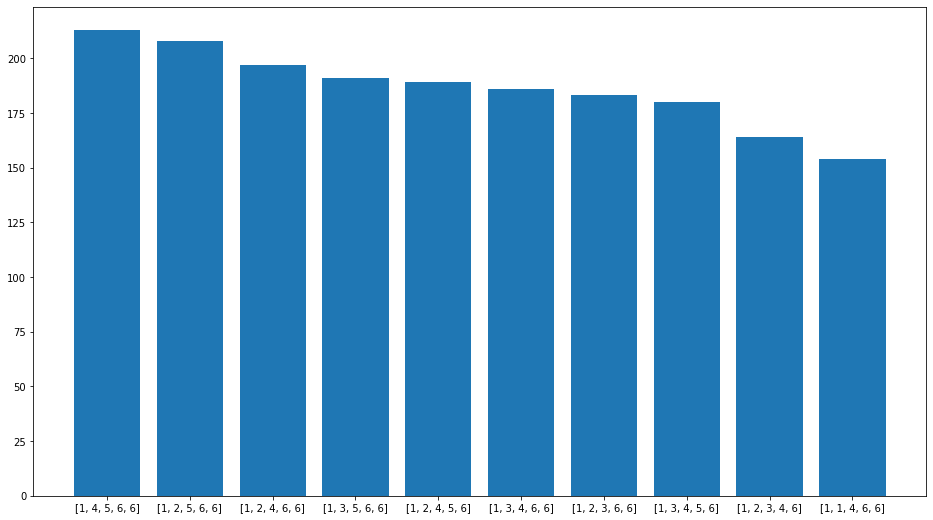

In [118]:
pyplot.figure(figsize=(16,9))
pyplot.bar(nums1, freqs1)

Scenario 3

In [120]:
letterdie = m.Die(['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z'])

In [125]:
letterdie.change_weight('a', 8.4966)
letterdie.change_weight('b', 2.0720)
letterdie.change_weight('c', 4.5388)
letterdie.change_weight('d', 3.3844)
letterdie.change_weight('e', 11.1607)
letterdie.change_weight('f', 1.8121)
letterdie.change_weight('g', 2.4705)
letterdie.change_weight('h', 3.0034)
letterdie.change_weight('i', 7.5448)
letterdie.change_weight('j', 0.1965)
letterdie.change_weight('k', 1.1016)
letterdie.change_weight('l',5.4893 )
letterdie.change_weight('m',3.0129 )
letterdie.change_weight('n',6.6544)
letterdie.change_weight('o',7.1635)
letterdie.change_weight('p',3.1671 )
letterdie.change_weight('q',0.1962 )
letterdie.change_weight('r',7.5809)
letterdie.change_weight('s',5.7351 )
letterdie.change_weight('t',6.9509)
letterdie.change_weight('u',3.6308 )
letterdie.change_weight('v',1.0074)
letterdie.change_weight('w',1.2899 )
letterdie.change_weight('x',0.2902 )
letterdie.change_weight('y',1.7779)
letterdie.change_weight('z',0.2722 )

In [138]:
letterdie1 = copy.deepcopy(letterdie)
letterdie2 = copy.deepcopy(letterdie)
letterdie3 = copy.deepcopy(letterdie)
letterdie4 = copy.deepcopy(letterdie)
letterdie5 = copy.deepcopy(letterdie)

In [139]:
g = m.Game([letterdie1, letterdie2, letterdie3, letterdie4, letterdie5])

In [142]:
g.play(1000)

In [146]:
g.show().apply(lambda x: pd.Series(x),1).value_counts().to_frame('n').reset_index()

,0,1,2,3,4,n
0,i,s,i,a,g,2
1,a,a,e,i,m,1
2,o,r,s,o,p,1
3,o,n,o,u,y,1
4,o,n,s,e,m,1
...,...,...,...,...,...,...
994,g,u,n,e,k,1
995,g,w,a,r,a,1
996,h,a,i,y,a,1
997,h,b,n,e,o,1


In [160]:
g.show().head(60)

die number,0,1,2,3,4
roll number,,,,,
0,i,t,l,u,e
1,c,e,m,t,d
2,d,m,m,b,t
3,l,i,t,d,a
4,s,e,o,p,e
5,u,m,y,s,e
6,y,t,e,o,n
7,t,b,h,e,n
8,l,l,r,c,p


In the first 60 rows I did not see a single 5-letter word, so the frequency most likely is less than 2% and I would guess even much less than 1%.